# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the first agent looks like:', states[1])
print(env_info.text_observations[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]



### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
if False:
    for i in range(1, 6):                                      # play game for 5 episodes
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            
            dones = env_info.local_done                        # see if episode finished
            print(rewards, dones)
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
if False:
    env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from rllib.agents import ActorCriticAgent
from rllib.models import QSequentialMLPModel

seed = 117  

In [6]:

agent1 = ActorCriticAgent(state_size, 
                 action_size, 
                 model_class_dict= {"model_class":QSequentialMLPModel, 
                                    'actor_hidden_layers':[256, 256],
                                   'critic_hidden_layers':[512],
                                   'critic_input_layer':0}, 
                    agent_params ={'n_agents':1, 'memory_size':20000, 'min_batch_size':128, 'actor_lr':1e-3, 'critic_lr':1e-4},rnd=seed, index=1)

agent2 = ActorCriticAgent(state_size, 
                 action_size, 
                 model_class_dict= {"model_class":QSequentialMLPModel, 
                                    'actor_hidden_layers':[256, 256],
                                   'critic_hidden_layers':[512],
                                   'critic_input_layer':0}, 
                    agent_params ={'n_agents':1, 'memory_size':20000, 'min_batch_size':128, 'actor_lr':1e-3, 'critic_lr':1e-4},rnd=seed, index=2)

Using: cpu
Using: cpu


In [ ]:
agent1 = QAgent(state_size, action_size, 1, hidden_layers_actor=[256, 256],
               hidden_layers_critic=[512], action_input_layer=0, rnd=117, index=1)

agent2 = QAgent(state_size, action_size, 1, hidden_layers_actor=[256, 256],
               hidden_layers_critic=[512], action_input_layer=0, rnd=117, index=2)

In [6]:
def train(n_episodes=50000, ep_max_time=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):
    scores = []
    eps = eps_start                    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        score = np.zeros(num_agents)
        for t in range(ep_max_time):
            action1 = agent1.predict(state[0], True, epsilon=eps)
            action2 = agent2.predict(state[1], True, epsilon=eps)
            action = [action1, action2]
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent1.step(state[0], action1, next_state[0], reward[0], done[0])
            agent2.step(state[1], action2, next_state[1], reward[1], done[1])
            state = next_state
            score += reward

            if np.any(done):
                break 
                
        scores.append(np.max(score))
        eps = max(eps_end, eps_decay*eps)
        print('Episode:', i_episode, ' Score:', np.mean(scores[-100:]), ' eps:', eps)
        
        if np.mean(scores[-100:])>= 0.5:
            print('Solved!!! Episodes:', i_episode, ' Score:', np.mean(scores[-100:]))
            agent1.save()
            agent2.save()
            break
    return scores

scores = train()

Episode: 1  Score: 0.0  eps: 0.99
Episode: 2  Score: 0.0  eps: 0.9801
Episode: 3  Score: 0.0  eps: 0.9702989999999999
Episode: 4  Score: 0.0  eps: 0.96059601
Episode: 5  Score: 0.0  eps: 0.9509900498999999
Episode: 6  Score: 0.0  eps: 0.9414801494009999
Episode: 7  Score: 0.0  eps: 0.9320653479069899
Episode: 8  Score: 0.0  eps: 0.92274469442792
Episode: 9  Score: 0.0  eps: 0.9135172474836407
Episode: 10  Score: 0.0  eps: 0.9043820750088043
Episode: 11  Score: 0.009090909226374193  eps: 0.8953382542587163
Episode: 12  Score: 0.008333333457509676  eps: 0.8863848717161291
Episode: 13  Score: 0.007692307806932009  eps: 0.8775210229989678
Episode: 14  Score: 0.007142857249294009  eps: 0.8687458127689781
Episode: 15  Score: 0.0066666667660077415  eps: 0.8600583546412883
Episode: 16  Score: 0.0062500000931322575  eps: 0.8514577710948754
Episode: 17  Score: 0.01176470605766072  eps: 0.8429431933839266
Episode: 18  Score: 0.011111111276679568  eps: 0.8345137614500874
Episode: 19  Score: 0.0105

Episode: 128  Score: 0.002800000049173832  eps: 0.2762516676992082
Episode: 129  Score: 0.002800000049173832  eps: 0.27348915102221616
Episode: 130  Score: 0.002800000049173832  eps: 0.270754259511994
Episode: 131  Score: 0.0018000000342726708  eps: 0.26804671691687404
Episode: 132  Score: 0.0009000000171363354  eps: 0.2653662497477053
Episode: 133  Score: 0.0009000000171363354  eps: 0.2627125872502282
Episode: 134  Score: 0.0009000000171363354  eps: 0.2600854613777259
Episode: 135  Score: 0.0009000000171363354  eps: 0.2574846067639487
Episode: 136  Score: 0.0009000000171363354  eps: 0.2549097606963092
Episode: 137  Score: 0.0009000000171363354  eps: 0.2523606630893461
Episode: 138  Score: 0.0009000000171363354  eps: 0.24983705645845267
Episode: 139  Score: 0.0009000000171363354  eps: 0.24733868589386815
Episode: 140  Score: 0.0009000000171363354  eps: 0.24486529903492946
Episode: 141  Score: 0.0009000000171363354  eps: 0.24241664604458016
Episode: 142  Score: 0.0009000000171363354  ep

Episode: 263  Score: 0.0  eps: 0.07113055202541574
Episode: 264  Score: 0.0  eps: 0.07041924650516158
Episode: 265  Score: 0.0  eps: 0.06971505404010997
Episode: 266  Score: 0.0  eps: 0.06901790349970886
Episode: 267  Score: 0.0  eps: 0.06832772446471178
Episode: 268  Score: 0.0  eps: 0.06764444722006466
Episode: 269  Score: 0.0  eps: 0.066968002747864
Episode: 270  Score: 0.0  eps: 0.06629832272038537
Episode: 271  Score: 0.0  eps: 0.06563533949318151
Episode: 272  Score: 0.0  eps: 0.06497898609824969
Episode: 273  Score: 0.0  eps: 0.0643291962372672
Episode: 274  Score: 0.0  eps: 0.06368590427489453
Episode: 275  Score: 0.0  eps: 0.06304904523214558
Episode: 276  Score: 0.0  eps: 0.06241855477982412
Episode: 277  Score: 0.0  eps: 0.06179436923202588
Episode: 278  Score: 0.0  eps: 0.06117642553970562
Episode: 279  Score: 0.0  eps: 0.06056466128430856
Episode: 280  Score: 0.0  eps: 0.05995901467146548
Episode: 281  Score: 0.0  eps: 0.05935942452475082
Episode: 282  Score: 0.0  eps: 0.0

Episode: 423  Score: 0.0  eps: 0.01424581547838222
Episode: 424  Score: 0.0  eps: 0.014103357323598397
Episode: 425  Score: 0.0  eps: 0.013962323750362413
Episode: 426  Score: 0.0  eps: 0.013822700512858789
Episode: 427  Score: 0.0  eps: 0.0136844735077302
Episode: 428  Score: 0.0  eps: 0.013547628772652899
Episode: 429  Score: 0.0  eps: 0.01341215248492637
Episode: 430  Score: 0.0  eps: 0.013278030960077106
Episode: 431  Score: 0.0  eps: 0.013145250650476335
Episode: 432  Score: 0.0  eps: 0.01301379814397157
Episode: 433  Score: 0.0  eps: 0.012883660162531854
Episode: 434  Score: 0.0  eps: 0.012754823560906535
Episode: 435  Score: 0.0  eps: 0.01262727532529747
Episode: 436  Score: 0.0  eps: 0.012501002572044496
Episode: 437  Score: 0.0  eps: 0.01237599254632405
Episode: 438  Score: 0.0  eps: 0.01225223262086081
Episode: 439  Score: 0.0  eps: 0.012129710294652202
Episode: 440  Score: 0.0  eps: 0.01200841319170568
Episode: 441  Score: 0.0  eps: 0.011888329059788623
Episode: 442  Score: 

Episode: 635  Score: 0.0  eps: 0.01
Episode: 636  Score: 0.0  eps: 0.01
Episode: 637  Score: 0.0  eps: 0.01
Episode: 638  Score: 0.0  eps: 0.01
Episode: 639  Score: 0.0  eps: 0.01
Episode: 640  Score: 0.0  eps: 0.01
Episode: 641  Score: 0.0  eps: 0.01
Episode: 642  Score: 0.0  eps: 0.01
Episode: 643  Score: 0.0  eps: 0.01
Episode: 644  Score: 0.0  eps: 0.01
Episode: 645  Score: 0.0  eps: 0.01
Episode: 646  Score: 0.0  eps: 0.01
Episode: 647  Score: 0.0  eps: 0.01
Episode: 648  Score: 0.0  eps: 0.01
Episode: 649  Score: 0.0  eps: 0.01
Episode: 650  Score: 0.0  eps: 0.01
Episode: 651  Score: 0.0  eps: 0.01
Episode: 652  Score: 0.0  eps: 0.01
Episode: 653  Score: 0.0  eps: 0.01
Episode: 654  Score: 0.0010000000149011613  eps: 0.01
Episode: 655  Score: 0.0010000000149011613  eps: 0.01
Episode: 656  Score: 0.0010000000149011613  eps: 0.01
Episode: 657  Score: 0.0010000000149011613  eps: 0.01
Episode: 658  Score: 0.0010000000149011613  eps: 0.01
Episode: 659  Score: 0.0010000000149011613  ep

Episode: 813  Score: 0.0  eps: 0.01
Episode: 814  Score: 0.0  eps: 0.01
Episode: 815  Score: 0.0  eps: 0.01
Episode: 816  Score: 0.0  eps: 0.01
Episode: 817  Score: 0.0  eps: 0.01
Episode: 818  Score: 0.0  eps: 0.01
Episode: 819  Score: 0.0  eps: 0.01
Episode: 820  Score: 0.0  eps: 0.01
Episode: 821  Score: 0.0  eps: 0.01
Episode: 822  Score: 0.0  eps: 0.01
Episode: 823  Score: 0.0  eps: 0.01
Episode: 824  Score: 0.0  eps: 0.01
Episode: 825  Score: 0.0  eps: 0.01
Episode: 826  Score: 0.0  eps: 0.01
Episode: 827  Score: 0.0  eps: 0.01
Episode: 828  Score: 0.0  eps: 0.01
Episode: 829  Score: 0.0  eps: 0.01
Episode: 830  Score: 0.0  eps: 0.01
Episode: 831  Score: 0.0  eps: 0.01
Episode: 832  Score: 0.0  eps: 0.01
Episode: 833  Score: 0.0  eps: 0.01
Episode: 834  Score: 0.0  eps: 0.01
Episode: 835  Score: 0.0  eps: 0.01
Episode: 836  Score: 0.0  eps: 0.01
Episode: 837  Score: 0.0  eps: 0.01
Episode: 838  Score: 0.0  eps: 0.01
Episode: 839  Score: 0.0  eps: 0.01
Episode: 840  Score: 0.0  ep

Episode: 1040  Score: 0.0  eps: 0.01
Episode: 1041  Score: 0.0  eps: 0.01
Episode: 1042  Score: 0.0  eps: 0.01
Episode: 1043  Score: 0.0  eps: 0.01
Episode: 1044  Score: 0.0  eps: 0.01
Episode: 1045  Score: 0.0  eps: 0.01
Episode: 1046  Score: 0.0  eps: 0.01
Episode: 1047  Score: 0.0  eps: 0.01
Episode: 1048  Score: 0.0  eps: 0.01
Episode: 1049  Score: 0.0  eps: 0.01
Episode: 1050  Score: 0.0  eps: 0.01
Episode: 1051  Score: 0.0  eps: 0.01
Episode: 1052  Score: 0.0  eps: 0.01
Episode: 1053  Score: 0.0  eps: 0.01
Episode: 1054  Score: 0.0  eps: 0.01
Episode: 1055  Score: 0.0  eps: 0.01
Episode: 1056  Score: 0.0  eps: 0.01
Episode: 1057  Score: 0.0  eps: 0.01
Episode: 1058  Score: 0.0  eps: 0.01
Episode: 1059  Score: 0.0  eps: 0.01
Episode: 1060  Score: 0.0  eps: 0.01
Episode: 1061  Score: 0.0  eps: 0.01
Episode: 1062  Score: 0.0  eps: 0.01
Episode: 1063  Score: 0.0  eps: 0.01
Episode: 1064  Score: 0.0  eps: 0.01
Episode: 1065  Score: 0.0  eps: 0.01
Episode: 1066  Score: 0.0  eps: 0.01
E

Episode: 1237  Score: 0.010800000168383122  eps: 0.01
Episode: 1238  Score: 0.010800000168383122  eps: 0.01
Episode: 1239  Score: 0.010800000168383122  eps: 0.01
Episode: 1240  Score: 0.010800000168383122  eps: 0.01
Episode: 1241  Score: 0.011800000183284283  eps: 0.01
Episode: 1242  Score: 0.011800000183284283  eps: 0.01
Episode: 1243  Score: 0.012800000198185444  eps: 0.01
Episode: 1244  Score: 0.012800000198185444  eps: 0.01
Episode: 1245  Score: 0.012800000198185444  eps: 0.01
Episode: 1246  Score: 0.01370000021532178  eps: 0.01
Episode: 1247  Score: 0.01370000021532178  eps: 0.01
Episode: 1248  Score: 0.01370000021532178  eps: 0.01
Episode: 1249  Score: 0.01370000021532178  eps: 0.01
Episode: 1250  Score: 0.01370000021532178  eps: 0.01
Episode: 1251  Score: 0.01370000021532178  eps: 0.01
Episode: 1252  Score: 0.01370000021532178  eps: 0.01
Episode: 1253  Score: 0.01370000021532178  eps: 0.01
Episode: 1254  Score: 0.01370000021532178  eps: 0.01
Episode: 1255  Score: 0.0137000002153

Episode: 1390  Score: 0.00490000007674098  eps: 0.01
Episode: 1391  Score: 0.00490000007674098  eps: 0.01
Episode: 1392  Score: 0.00490000007674098  eps: 0.01
Episode: 1393  Score: 0.00490000007674098  eps: 0.01
Episode: 1394  Score: 0.00490000007674098  eps: 0.01
Episode: 1395  Score: 0.00490000007674098  eps: 0.01
Episode: 1396  Score: 0.00490000007674098  eps: 0.01
Episode: 1397  Score: 0.00490000007674098  eps: 0.01
Episode: 1398  Score: 0.00490000007674098  eps: 0.01
Episode: 1399  Score: 0.00490000007674098  eps: 0.01
Episode: 1400  Score: 0.00490000007674098  eps: 0.01
Episode: 1401  Score: 0.00490000007674098  eps: 0.01
Episode: 1402  Score: 0.00490000007674098  eps: 0.01
Episode: 1403  Score: 0.00490000007674098  eps: 0.01
Episode: 1404  Score: 0.00490000007674098  eps: 0.01
Episode: 1405  Score: 0.00490000007674098  eps: 0.01
Episode: 1406  Score: 0.005900000091642142  eps: 0.01
Episode: 1407  Score: 0.005900000091642142  eps: 0.01
Episode: 1408  Score: 0.006900000106543303  

Episode: 1543  Score: 0.03250000050291419  eps: 0.01
Episode: 1544  Score: 0.03250000050291419  eps: 0.01
Episode: 1545  Score: 0.03250000050291419  eps: 0.01
Episode: 1546  Score: 0.03350000051781535  eps: 0.01
Episode: 1547  Score: 0.03450000053271651  eps: 0.01
Episode: 1548  Score: 0.03450000053271651  eps: 0.01
Episode: 1549  Score: 0.03550000054761768  eps: 0.01
Episode: 1550  Score: 0.03550000054761768  eps: 0.01
Episode: 1551  Score: 0.036500000562518835  eps: 0.01
Episode: 1552  Score: 0.036500000562518835  eps: 0.01
Episode: 1553  Score: 0.036500000562518835  eps: 0.01
Episode: 1554  Score: 0.036500000562518835  eps: 0.01
Episode: 1555  Score: 0.036500000562518835  eps: 0.01
Episode: 1556  Score: 0.036500000562518835  eps: 0.01
Episode: 1557  Score: 0.036500000562518835  eps: 0.01
Episode: 1558  Score: 0.036500000562518835  eps: 0.01
Episode: 1559  Score: 0.036500000562518835  eps: 0.01
Episode: 1560  Score: 0.03550000054761768  eps: 0.01
Episode: 1561  Score: 0.0355000005476

Episode: 1696  Score: 0.02200000036507845  eps: 0.01
Episode: 1697  Score: 0.02200000036507845  eps: 0.01
Episode: 1698  Score: 0.02200000036507845  eps: 0.01
Episode: 1699  Score: 0.02200000036507845  eps: 0.01
Episode: 1700  Score: 0.022900000382214784  eps: 0.01
Episode: 1701  Score: 0.022900000382214784  eps: 0.01
Episode: 1702  Score: 0.02380000039935112  eps: 0.01
Episode: 1703  Score: 0.02380000039935112  eps: 0.01
Episode: 1704  Score: 0.025700000431388616  eps: 0.01
Episode: 1705  Score: 0.025700000431388616  eps: 0.01
Episode: 1706  Score: 0.025700000431388616  eps: 0.01
Episode: 1707  Score: 0.02380000039935112  eps: 0.01
Episode: 1708  Score: 0.02380000039935112  eps: 0.01
Episode: 1709  Score: 0.02380000039935112  eps: 0.01
Episode: 1710  Score: 0.02380000039935112  eps: 0.01
Episode: 1711  Score: 0.02380000039935112  eps: 0.01
Episode: 1712  Score: 0.02380000039935112  eps: 0.01
Episode: 1713  Score: 0.02380000039935112  eps: 0.01
Episode: 1714  Score: 0.02380000039935112

Episode: 1849  Score: 0.015000000260770321  eps: 0.01
Episode: 1850  Score: 0.015000000260770321  eps: 0.01
Episode: 1851  Score: 0.015000000260770321  eps: 0.01
Episode: 1852  Score: 0.015000000260770321  eps: 0.01
Episode: 1853  Score: 0.015000000260770321  eps: 0.01
Episode: 1854  Score: 0.016000000275671483  eps: 0.01
Episode: 1855  Score: 0.015100000258535147  eps: 0.01
Episode: 1856  Score: 0.015100000258535147  eps: 0.01
Episode: 1857  Score: 0.015100000258535147  eps: 0.01
Episode: 1858  Score: 0.014200000241398811  eps: 0.01
Episode: 1859  Score: 0.014200000241398811  eps: 0.01
Episode: 1860  Score: 0.014200000241398811  eps: 0.01
Episode: 1861  Score: 0.014200000241398811  eps: 0.01
Episode: 1862  Score: 0.014200000241398811  eps: 0.01
Episode: 1863  Score: 0.015200000256299973  eps: 0.01
Episode: 1864  Score: 0.015200000256299973  eps: 0.01
Episode: 1865  Score: 0.015200000256299973  eps: 0.01
Episode: 1866  Score: 0.015200000256299973  eps: 0.01
Episode: 1867  Score: 0.0143

Episode: 2002  Score: 0.03440000057220459  eps: 0.01
Episode: 2003  Score: 0.03340000055730343  eps: 0.01
Episode: 2004  Score: 0.03350000055506826  eps: 0.01
Episode: 2005  Score: 0.03350000055506826  eps: 0.01
Episode: 2006  Score: 0.03260000053793192  eps: 0.01
Episode: 2007  Score: 0.03250000054016709  eps: 0.01
Episode: 2008  Score: 0.03250000054016709  eps: 0.01
Episode: 2009  Score: 0.03250000054016709  eps: 0.01
Episode: 2010  Score: 0.03340000055730343  eps: 0.01
Episode: 2011  Score: 0.034300000574439764  eps: 0.01
Episode: 2012  Score: 0.034300000574439764  eps: 0.01
Episode: 2013  Score: 0.03530000058934093  eps: 0.01
Episode: 2014  Score: 0.034300000574439764  eps: 0.01
Episode: 2015  Score: 0.034300000574439764  eps: 0.01
Episode: 2016  Score: 0.034300000574439764  eps: 0.01
Episode: 2017  Score: 0.034300000574439764  eps: 0.01
Episode: 2018  Score: 0.0352000005915761  eps: 0.01
Episode: 2019  Score: 0.0352000005915761  eps: 0.01
Episode: 2020  Score: 0.0352000005915761  

Episode: 2157  Score: 0.04580000076442957  eps: 0.01
Episode: 2158  Score: 0.04480000074952841  eps: 0.01
Episode: 2159  Score: 0.04580000076442957  eps: 0.01
Episode: 2160  Score: 0.04680000077933073  eps: 0.01
Episode: 2161  Score: 0.04780000079423189  eps: 0.01
Episode: 2162  Score: 0.048800000809133055  eps: 0.01
Episode: 2163  Score: 0.04890000080689788  eps: 0.01
Episode: 2164  Score: 0.047900000791996716  eps: 0.01
Episode: 2165  Score: 0.04800000078976154  eps: 0.01
Episode: 2166  Score: 0.04890000080689788  eps: 0.01
Episode: 2167  Score: 0.04890000080689788  eps: 0.01
Episode: 2168  Score: 0.04980000082403421  eps: 0.01
Episode: 2169  Score: 0.04980000082403421  eps: 0.01
Episode: 2170  Score: 0.05080000083893538  eps: 0.01
Episode: 2171  Score: 0.04980000082403421  eps: 0.01
Episode: 2172  Score: 0.04980000082403421  eps: 0.01
Episode: 2173  Score: 0.04970000082626939  eps: 0.01
Episode: 2174  Score: 0.050600000843405726  eps: 0.01
Episode: 2175  Score: 0.050600000843405726 

Episode: 2311  Score: 0.04710000080987811  eps: 0.01
Episode: 2312  Score: 0.048000000827014444  eps: 0.01
Episode: 2313  Score: 0.04710000080987811  eps: 0.01
Episode: 2314  Score: 0.04710000080987811  eps: 0.01
Episode: 2315  Score: 0.04710000080987811  eps: 0.01
Episode: 2316  Score: 0.04710000080987811  eps: 0.01
Episode: 2317  Score: 0.04720000080764294  eps: 0.01
Episode: 2318  Score: 0.04720000080764294  eps: 0.01
Episode: 2319  Score: 0.04720000080764294  eps: 0.01
Episode: 2320  Score: 0.0463000007905066  eps: 0.01
Episode: 2321  Score: 0.0463000007905066  eps: 0.01
Episode: 2322  Score: 0.0463000007905066  eps: 0.01
Episode: 2323  Score: 0.0463000007905066  eps: 0.01
Episode: 2324  Score: 0.04720000080764294  eps: 0.01
Episode: 2325  Score: 0.04720000080764294  eps: 0.01
Episode: 2326  Score: 0.04810000082477927  eps: 0.01
Episode: 2327  Score: 0.04720000080764294  eps: 0.01
Episode: 2328  Score: 0.04720000080764294  eps: 0.01
Episode: 2329  Score: 0.04710000080987811  eps: 0

Episode: 2465  Score: 0.04760000079870224  eps: 0.01
Episode: 2466  Score: 0.048600000813603404  eps: 0.01
Episode: 2467  Score: 0.04870000081136823  eps: 0.01
Episode: 2468  Score: 0.04870000081136823  eps: 0.01
Episode: 2469  Score: 0.04970000082626939  eps: 0.01
Episode: 2470  Score: 0.04970000082626939  eps: 0.01
Episode: 2471  Score: 0.048800000809133055  eps: 0.01
Episode: 2472  Score: 0.04980000082403421  eps: 0.01
Episode: 2473  Score: 0.05080000083893538  eps: 0.01
Episode: 2474  Score: 0.0509000008367002  eps: 0.01
Episode: 2475  Score: 0.04990000082179904  eps: 0.01
Episode: 2476  Score: 0.04990000082179904  eps: 0.01
Episode: 2477  Score: 0.0509000008367002  eps: 0.01
Episode: 2478  Score: 0.0509000008367002  eps: 0.01
Episode: 2479  Score: 0.05190000085160136  eps: 0.01
Episode: 2480  Score: 0.05100000083446503  eps: 0.01
Episode: 2481  Score: 0.052000000849366186  eps: 0.01
Episode: 2482  Score: 0.052900000866502525  eps: 0.01
Episode: 2483  Score: 0.05190000085160136  ep

Episode: 2619  Score: 0.043100000675767663  eps: 0.01
Episode: 2620  Score: 0.0421000006608665  eps: 0.01
Episode: 2621  Score: 0.0421000006608665  eps: 0.01
Episode: 2622  Score: 0.041100000645965334  eps: 0.01
Episode: 2623  Score: 0.041100000645965334  eps: 0.01
Episode: 2624  Score: 0.0421000006608665  eps: 0.01
Episode: 2625  Score: 0.041100000645965334  eps: 0.01
Episode: 2626  Score: 0.041100000645965334  eps: 0.01
Episode: 2627  Score: 0.04010000063106418  eps: 0.01
Episode: 2628  Score: 0.04010000063106418  eps: 0.01
Episode: 2629  Score: 0.03710000058636069  eps: 0.01
Episode: 2630  Score: 0.03610000057145953  eps: 0.01
Episode: 2631  Score: 0.03610000057145953  eps: 0.01
Episode: 2632  Score: 0.03510000055655837  eps: 0.01
Episode: 2633  Score: 0.03410000054165721  eps: 0.01
Episode: 2634  Score: 0.03410000054165721  eps: 0.01
Episode: 2635  Score: 0.03510000055655837  eps: 0.01
Episode: 2636  Score: 0.03510000055655837  eps: 0.01
Episode: 2637  Score: 0.03510000055655837  e

Episode: 2773  Score: 0.041100000645965334  eps: 0.01
Episode: 2774  Score: 0.041100000645965334  eps: 0.01
Episode: 2775  Score: 0.041100000645965334  eps: 0.01
Episode: 2776  Score: 0.041100000645965334  eps: 0.01
Episode: 2777  Score: 0.041100000645965334  eps: 0.01
Episode: 2778  Score: 0.04300000067800283  eps: 0.01
Episode: 2779  Score: 0.0421000006608665  eps: 0.01
Episode: 2780  Score: 0.0421000006608665  eps: 0.01
Episode: 2781  Score: 0.04200000066310167  eps: 0.01
Episode: 2782  Score: 0.04300000067800283  eps: 0.01
Episode: 2783  Score: 0.04300000067800283  eps: 0.01
Episode: 2784  Score: 0.04300000067800283  eps: 0.01
Episode: 2785  Score: 0.04300000067800283  eps: 0.01
Episode: 2786  Score: 0.04490000071004033  eps: 0.01
Episode: 2787  Score: 0.04490000071004033  eps: 0.01
Episode: 2788  Score: 0.04590000072494149  eps: 0.01
Episode: 2789  Score: 0.04490000071004033  eps: 0.01
Episode: 2790  Score: 0.04490000071004033  eps: 0.01
Episode: 2791  Score: 0.04490000071004033  

Episode: 2928  Score: 0.07960000123828649  eps: 0.01
Episode: 2929  Score: 0.08060000125318766  eps: 0.01
Episode: 2930  Score: 0.08060000125318766  eps: 0.01
Episode: 2931  Score: 0.08060000125318766  eps: 0.01
Episode: 2932  Score: 0.08070000125095249  eps: 0.01
Episode: 2933  Score: 0.08070000125095249  eps: 0.01
Episode: 2934  Score: 0.07980000123381614  eps: 0.01
Episode: 2935  Score: 0.07990000123158097  eps: 0.01
Episode: 2936  Score: 0.07880000121891499  eps: 0.01
Episode: 2937  Score: 0.07880000121891499  eps: 0.01
Episode: 2938  Score: 0.07880000121891499  eps: 0.01
Episode: 2939  Score: 0.07870000122115016  eps: 0.01
Episode: 2940  Score: 0.077700001206249  eps: 0.01
Episode: 2941  Score: 0.07870000122115016  eps: 0.01
Episode: 2942  Score: 0.077700001206249  eps: 0.01
Episode: 2943  Score: 0.077700001206249  eps: 0.01
Episode: 2944  Score: 0.077700001206249  eps: 0.01
Episode: 2945  Score: 0.07780000120401383  eps: 0.01
Episode: 2946  Score: 0.07780000120401383  eps: 0.01
E

Episode: 3083  Score: 0.0643000010214746  eps: 0.01
Episode: 3084  Score: 0.06630000105127692  eps: 0.01
Episode: 3085  Score: 0.06730000106617809  eps: 0.01
Episode: 3086  Score: 0.06730000106617809  eps: 0.01
Episode: 3087  Score: 0.0693000010959804  eps: 0.01
Episode: 3088  Score: 0.06830000108107924  eps: 0.01
Episode: 3089  Score: 0.07020000111311674  eps: 0.01
Episode: 3090  Score: 0.0693000010959804  eps: 0.01
Episode: 3091  Score: 0.0693000010959804  eps: 0.01
Episode: 3092  Score: 0.07030000111088157  eps: 0.01
Episode: 3093  Score: 0.0693000010959804  eps: 0.01
Episode: 3094  Score: 0.07130000112578273  eps: 0.01
Episode: 3095  Score: 0.06940000109374524  eps: 0.01
Episode: 3096  Score: 0.06940000109374524  eps: 0.01
Episode: 3097  Score: 0.06940000109374524  eps: 0.01
Episode: 3098  Score: 0.07040000110864639  eps: 0.01
Episode: 3099  Score: 0.07140000112354755  eps: 0.01
Episode: 3100  Score: 0.07130000112578273  eps: 0.01
Episode: 3101  Score: 0.07030000111088157  eps: 0.0

Episode: 3239  Score: 0.09500000145286322  eps: 0.01
Episode: 3240  Score: 0.09500000145286322  eps: 0.01
Episode: 3241  Score: 0.09500000145286322  eps: 0.01
Episode: 3242  Score: 0.09500000145286322  eps: 0.01
Episode: 3243  Score: 0.09500000145286322  eps: 0.01
Episode: 3244  Score: 0.09500000145286322  eps: 0.01
Episode: 3245  Score: 0.09500000145286322  eps: 0.01
Episode: 3246  Score: 0.09500000145286322  eps: 0.01
Episode: 3247  Score: 0.09510000145062804  eps: 0.01
Episode: 3248  Score: 0.09410000143572689  eps: 0.01
Episode: 3249  Score: 0.09510000145062804  eps: 0.01
Episode: 3250  Score: 0.09510000145062804  eps: 0.01
Episode: 3251  Score: 0.09310000142082572  eps: 0.01
Episode: 3252  Score: 0.09310000142082572  eps: 0.01
Episode: 3253  Score: 0.09310000142082572  eps: 0.01
Episode: 3254  Score: 0.0911000013910234  eps: 0.01
Episode: 3255  Score: 0.09020000137388706  eps: 0.01
Episode: 3256  Score: 0.0892000013589859  eps: 0.01
Episode: 3257  Score: 0.0873000013269484  eps: 0

Episode: 3394  Score: 0.09020000137388706  eps: 0.01
Episode: 3395  Score: 0.09010000137612223  eps: 0.01
Episode: 3396  Score: 0.0911000013910234  eps: 0.01
Episode: 3397  Score: 0.0911000013910234  eps: 0.01
Episode: 3398  Score: 0.09010000137612223  eps: 0.01
Episode: 3399  Score: 0.08910000136122108  eps: 0.01
Episode: 3400  Score: 0.08910000136122108  eps: 0.01
Episode: 3401  Score: 0.09000000137835741  eps: 0.01
Episode: 3402  Score: 0.08910000136122108  eps: 0.01
Episode: 3403  Score: 0.09020000137388706  eps: 0.01
Episode: 3404  Score: 0.0892000013589859  eps: 0.01
Episode: 3405  Score: 0.09010000137612223  eps: 0.01
Episode: 3406  Score: 0.08910000136122108  eps: 0.01
Episode: 3407  Score: 0.08710000133141875  eps: 0.01
Episode: 3408  Score: 0.08710000133141875  eps: 0.01
Episode: 3409  Score: 0.08810000134631991  eps: 0.01
Episode: 3410  Score: 0.08810000134631991  eps: 0.01
Episode: 3411  Score: 0.08800000134855508  eps: 0.01
Episode: 3412  Score: 0.08800000134855508  eps: 0

Episode: 3550  Score: 0.08290000131353736  eps: 0.01
Episode: 3551  Score: 0.0819000012986362  eps: 0.01
Episode: 3552  Score: 0.08090000128373503  eps: 0.01
Episode: 3553  Score: 0.07990000126883387  eps: 0.01
Episode: 3554  Score: 0.08080000128597022  eps: 0.01
Episode: 3555  Score: 0.08070000128820538  eps: 0.01
Episode: 3556  Score: 0.07970000127330422  eps: 0.01
Episode: 3557  Score: 0.08070000128820538  eps: 0.01
Episode: 3558  Score: 0.08060000129044056  eps: 0.01
Episode: 3559  Score: 0.0796000012755394  eps: 0.01
Episode: 3560  Score: 0.0796000012755394  eps: 0.01
Episode: 3561  Score: 0.07950000127777457  eps: 0.01
Episode: 3562  Score: 0.0796000012755394  eps: 0.01
Episode: 3563  Score: 0.0796000012755394  eps: 0.01
Episode: 3564  Score: 0.08060000129044056  eps: 0.01
Episode: 3565  Score: 0.08060000129044056  eps: 0.01
Episode: 3566  Score: 0.08160000130534172  eps: 0.01
Episode: 3567  Score: 0.08260000132024288  eps: 0.01
Episode: 3568  Score: 0.08170000130310655  eps: 0.0

Episode: 3705  Score: 0.09470000145956874  eps: 0.01
Episode: 3706  Score: 0.09360000144690275  eps: 0.01
Episode: 3707  Score: 0.09360000144690275  eps: 0.01
Episode: 3708  Score: 0.09360000144690275  eps: 0.01
Episode: 3709  Score: 0.09360000144690275  eps: 0.01
Episode: 3710  Score: 0.09460000146180392  eps: 0.01
Episode: 3711  Score: 0.09470000145956874  eps: 0.01
Episode: 3712  Score: 0.0957000014744699  eps: 0.01
Episode: 3713  Score: 0.0957000014744699  eps: 0.01
Episode: 3714  Score: 0.0957000014744699  eps: 0.01
Episode: 3715  Score: 0.09470000145956874  eps: 0.01
Episode: 3716  Score: 0.09470000145956874  eps: 0.01
Episode: 3717  Score: 0.0957000014744699  eps: 0.01
Episode: 3718  Score: 0.0957000014744699  eps: 0.01
Episode: 3719  Score: 0.0957000014744699  eps: 0.01
Episode: 3720  Score: 0.09970000153407454  eps: 0.01
Episode: 3721  Score: 0.09980000153183938  eps: 0.01
Episode: 3722  Score: 0.09980000153183938  eps: 0.01
Episode: 3723  Score: 0.09980000153183938  eps: 0.01

Episode: 3860  Score: 0.08980000138282776  eps: 0.01
Episode: 3861  Score: 0.08980000138282776  eps: 0.01
Episode: 3862  Score: 0.08980000138282776  eps: 0.01
Episode: 3863  Score: 0.0888000013679266  eps: 0.01
Episode: 3864  Score: 0.0888000013679266  eps: 0.01
Episode: 3865  Score: 0.08980000138282776  eps: 0.01
Episode: 3866  Score: 0.09180000141263008  eps: 0.01
Episode: 3867  Score: 0.09080000139772892  eps: 0.01
Episode: 3868  Score: 0.09080000139772892  eps: 0.01
Episode: 3869  Score: 0.09080000139772892  eps: 0.01
Episode: 3870  Score: 0.09180000141263008  eps: 0.01
Episode: 3871  Score: 0.08980000138282776  eps: 0.01
Episode: 3872  Score: 0.0888000013679266  eps: 0.01
Episode: 3873  Score: 0.09080000139772892  eps: 0.01
Episode: 3874  Score: 0.08980000138282776  eps: 0.01
Episode: 3875  Score: 0.08980000138282776  eps: 0.01
Episode: 3876  Score: 0.08980000138282776  eps: 0.01
Episode: 3877  Score: 0.08970000138506293  eps: 0.01
Episode: 3878  Score: 0.08970000138506293  eps: 0

Episode: 4015  Score: 0.10080000160261988  eps: 0.01
Episode: 4016  Score: 0.10080000160261988  eps: 0.01
Episode: 4017  Score: 0.10090000160038472  eps: 0.01
Episode: 4018  Score: 0.10190000161528587  eps: 0.01
Episode: 4019  Score: 0.1039000016450882  eps: 0.01
Episode: 4020  Score: 0.10380000164732336  eps: 0.01
Episode: 4021  Score: 0.10370000164955855  eps: 0.01
Episode: 4022  Score: 0.10280000161379575  eps: 0.01
Episode: 4023  Score: 0.10280000161379575  eps: 0.01
Episode: 4024  Score: 0.1018000015988946  eps: 0.01
Episode: 4025  Score: 0.10080000158399344  eps: 0.01
Episode: 4026  Score: 0.10080000158399344  eps: 0.01
Episode: 4027  Score: 0.10080000158399344  eps: 0.01
Episode: 4028  Score: 0.09980000156909227  eps: 0.01
Episode: 4029  Score: 0.09890000155195594  eps: 0.01
Episode: 4030  Score: 0.09880000155419111  eps: 0.01
Episode: 4031  Score: 0.09780000153928996  eps: 0.01
Episode: 4032  Score: 0.09780000153928996  eps: 0.01
Episode: 4033  Score: 0.09780000153928996  eps: 

Episode: 4171  Score: 0.10670000163838267  eps: 0.01
Episode: 4172  Score: 0.10770000165328383  eps: 0.01
Episode: 4173  Score: 0.108700001668185  eps: 0.01
Episode: 4174  Score: 0.10770000165328383  eps: 0.01
Episode: 4175  Score: 0.1068000016361475  eps: 0.01
Episode: 4176  Score: 0.10980000168085098  eps: 0.01
Episode: 4177  Score: 0.10890000166371465  eps: 0.01
Episode: 4178  Score: 0.10790000164881348  eps: 0.01
Episode: 4179  Score: 0.10790000164881348  eps: 0.01
Episode: 4180  Score: 0.10790000164881348  eps: 0.01
Episode: 4181  Score: 0.10700000163167715  eps: 0.01
Episode: 4182  Score: 0.10600000161677599  eps: 0.01
Episode: 4183  Score: 0.10600000161677599  eps: 0.01
Episode: 4184  Score: 0.10700000163167715  eps: 0.01
Episode: 4185  Score: 0.10700000163167715  eps: 0.01
Episode: 4186  Score: 0.10600000161677599  eps: 0.01
Episode: 4187  Score: 0.10510000159963966  eps: 0.01
Episode: 4188  Score: 0.10410000158473849  eps: 0.01
Episode: 4189  Score: 0.10410000158473849  eps: 0

Episode: 4326  Score: 0.09410000143572689  eps: 0.01
Episode: 4327  Score: 0.09510000145062804  eps: 0.01
Episode: 4328  Score: 0.09510000145062804  eps: 0.01
Episode: 4329  Score: 0.0961000014655292  eps: 0.01
Episode: 4330  Score: 0.09620000146329404  eps: 0.01
Episode: 4331  Score: 0.09620000146329404  eps: 0.01
Episode: 4332  Score: 0.09520000144839287  eps: 0.01
Episode: 4333  Score: 0.09520000144839287  eps: 0.01
Episode: 4334  Score: 0.0942000014334917  eps: 0.01
Episode: 4335  Score: 0.09520000144839287  eps: 0.01
Episode: 4336  Score: 0.09510000145062804  eps: 0.01
Episode: 4337  Score: 0.09510000145062804  eps: 0.01
Episode: 4338  Score: 0.09510000145062804  eps: 0.01
Episode: 4339  Score: 0.0961000014655292  eps: 0.01
Episode: 4340  Score: 0.09510000145062804  eps: 0.01
Episode: 4341  Score: 0.09510000145062804  eps: 0.01
Episode: 4342  Score: 0.0961000014655292  eps: 0.01
Episode: 4343  Score: 0.09710000148043037  eps: 0.01
Episode: 4344  Score: 0.0980000014975667  eps: 0.0

Episode: 4482  Score: 0.10800000166520476  eps: 0.01
Episode: 4483  Score: 0.10800000166520476  eps: 0.01
Episode: 4484  Score: 0.1070000016503036  eps: 0.01
Episode: 4485  Score: 0.10600000163540244  eps: 0.01
Episode: 4486  Score: 0.1070000016503036  eps: 0.01
Episode: 4487  Score: 0.1070000016503036  eps: 0.01
Episode: 4488  Score: 0.10800000166520476  eps: 0.01
Episode: 4489  Score: 0.1070000016503036  eps: 0.01
Episode: 4490  Score: 0.1070000016503036  eps: 0.01
Episode: 4491  Score: 0.10790000166743993  eps: 0.01
Episode: 4492  Score: 0.1089000016823411  eps: 0.01
Episode: 4493  Score: 0.1089000016823411  eps: 0.01
Episode: 4494  Score: 0.10990000169724226  eps: 0.01
Episode: 4495  Score: 0.10990000169724226  eps: 0.01
Episode: 4496  Score: 0.10900000168010593  eps: 0.01
Episode: 4497  Score: 0.10810000166296958  eps: 0.01
Episode: 4498  Score: 0.10910000167787075  eps: 0.01
Episode: 4499  Score: 0.10910000167787075  eps: 0.01
Episode: 4500  Score: 0.10910000167787075  eps: 0.01


Episode: 4638  Score: 0.11230000173673034  eps: 0.01
Episode: 4639  Score: 0.11130000172182918  eps: 0.01
Episode: 4640  Score: 0.11130000172182918  eps: 0.01
Episode: 4641  Score: 0.11230000173673034  eps: 0.01
Episode: 4642  Score: 0.10940000168979168  eps: 0.01
Episode: 4643  Score: 0.11240000173449516  eps: 0.01
Episode: 4644  Score: 0.11240000173449516  eps: 0.01
Episode: 4645  Score: 0.11140000171959401  eps: 0.01
Episode: 4646  Score: 0.11140000171959401  eps: 0.01
Episode: 4647  Score: 0.11140000171959401  eps: 0.01
Episode: 4648  Score: 0.11440000176429749  eps: 0.01
Episode: 4649  Score: 0.11440000176429749  eps: 0.01
Episode: 4650  Score: 0.11440000176429749  eps: 0.01
Episode: 4651  Score: 0.11440000176429749  eps: 0.01
Episode: 4652  Score: 0.11440000176429749  eps: 0.01
Episode: 4653  Score: 0.11440000176429749  eps: 0.01
Episode: 4654  Score: 0.11530000178143382  eps: 0.01
Episode: 4655  Score: 0.11730000181123615  eps: 0.01
Episode: 4656  Score: 0.115200001783669  eps: 

Episode: 4793  Score: 0.09060000140219927  eps: 0.01
Episode: 4794  Score: 0.09160000141710042  eps: 0.01
Episode: 4795  Score: 0.09160000141710042  eps: 0.01
Episode: 4796  Score: 0.09270000142976642  eps: 0.01
Episode: 4797  Score: 0.09270000142976642  eps: 0.01
Episode: 4798  Score: 0.09360000144690275  eps: 0.01
Episode: 4799  Score: 0.09270000142976642  eps: 0.01
Episode: 4800  Score: 0.09270000142976642  eps: 0.01
Episode: 4801  Score: 0.09270000142976642  eps: 0.01
Episode: 4802  Score: 0.09360000144690275  eps: 0.01
Episode: 4803  Score: 0.09460000146180392  eps: 0.01
Episode: 4804  Score: 0.09460000146180392  eps: 0.01
Episode: 4805  Score: 0.09460000146180392  eps: 0.01
Episode: 4806  Score: 0.09460000146180392  eps: 0.01
Episode: 4807  Score: 0.09450000146403909  eps: 0.01
Episode: 4808  Score: 0.09550000147894025  eps: 0.01
Episode: 4809  Score: 0.09460000146180392  eps: 0.01
Episode: 4810  Score: 0.09460000146180392  eps: 0.01
Episode: 4811  Score: 0.09470000145956874  eps

Episode: 4949  Score: 0.13680000208318233  eps: 0.01
Episode: 4950  Score: 0.13680000208318233  eps: 0.01
Episode: 4951  Score: 0.13580000206828116  eps: 0.01
Episode: 4952  Score: 0.13580000206828116  eps: 0.01
Episode: 4953  Score: 0.13580000206828116  eps: 0.01
Episode: 4954  Score: 0.13680000208318233  eps: 0.01
Episode: 4955  Score: 0.1378000020980835  eps: 0.01
Episode: 4956  Score: 0.13790000209584832  eps: 0.01
Episode: 4957  Score: 0.13790000209584832  eps: 0.01
Episode: 4958  Score: 0.13790000209584832  eps: 0.01
Episode: 4959  Score: 0.13690000208094716  eps: 0.01
Episode: 4960  Score: 0.1378000020980835  eps: 0.01
Episode: 4961  Score: 0.13880000211298466  eps: 0.01
Episode: 4962  Score: 0.1389000021107495  eps: 0.01
Episode: 4963  Score: 0.13990000212565065  eps: 0.01
Episode: 4964  Score: 0.13990000212565065  eps: 0.01
Episode: 4965  Score: 0.13790000209584832  eps: 0.01
Episode: 4966  Score: 0.1389000021107495  eps: 0.01
Episode: 4967  Score: 0.13690000208094716  eps: 0.

Episode: 5105  Score: 0.12690000193193554  eps: 0.01
Episode: 5106  Score: 0.12590000191703438  eps: 0.01
Episode: 5107  Score: 0.1309000019915402  eps: 0.01
Episode: 5108  Score: 0.12990000197663903  eps: 0.01
Episode: 5109  Score: 0.12990000197663903  eps: 0.01
Episode: 5110  Score: 0.12990000197663903  eps: 0.01
Episode: 5111  Score: 0.13290000202134253  eps: 0.01
Episode: 5112  Score: 0.13190000200644136  eps: 0.01
Episode: 5113  Score: 0.13290000202134253  eps: 0.01
Episode: 5114  Score: 0.13190000200644136  eps: 0.01
Episode: 5115  Score: 0.13200000200420617  eps: 0.01
Episode: 5116  Score: 0.132100002001971  eps: 0.01
Episode: 5117  Score: 0.132100002001971  eps: 0.01
Episode: 5118  Score: 0.13310000201687217  eps: 0.01
Episode: 5119  Score: 0.1340000020340085  eps: 0.01
Episode: 5120  Score: 0.13200000200420617  eps: 0.01
Episode: 5121  Score: 0.13200000200420617  eps: 0.01
Episode: 5122  Score: 0.13100000198930503  eps: 0.01
Episode: 5123  Score: 0.1340000020340085  eps: 0.01


Episode: 5261  Score: 0.14480000220239161  eps: 0.01
Episode: 5262  Score: 0.14580000221729278  eps: 0.01
Episode: 5263  Score: 0.1428000021725893  eps: 0.01
Episode: 5264  Score: 0.1428000021725893  eps: 0.01
Episode: 5265  Score: 0.14380000218749045  eps: 0.01
Episode: 5266  Score: 0.14580000221729278  eps: 0.01
Episode: 5267  Score: 0.14680000223219394  eps: 0.01
Episode: 5268  Score: 0.14380000218749045  eps: 0.01
Episode: 5269  Score: 0.13980000212788582  eps: 0.01
Episode: 5270  Score: 0.1428000021725893  eps: 0.01
Episode: 5271  Score: 0.14180000215768815  eps: 0.01
Episode: 5272  Score: 0.14080000214278698  eps: 0.01
Episode: 5273  Score: 0.14080000214278698  eps: 0.01
Episode: 5274  Score: 0.14080000214278698  eps: 0.01
Episode: 5275  Score: 0.14080000214278698  eps: 0.01
Episode: 5276  Score: 0.14190000215545295  eps: 0.01
Episode: 5277  Score: 0.14190000215545295  eps: 0.01
Episode: 5278  Score: 0.14000000212341546  eps: 0.01
Episode: 5279  Score: 0.14000000212341546  eps: 0

Episode: 5417  Score: 0.14980000227689744  eps: 0.01
Episode: 5418  Score: 0.14980000227689744  eps: 0.01
Episode: 5419  Score: 0.14980000227689744  eps: 0.01
Episode: 5420  Score: 0.1478000022470951  eps: 0.01
Episode: 5421  Score: 0.14770000224933028  eps: 0.01
Episode: 5422  Score: 0.1497000022791326  eps: 0.01
Episode: 5423  Score: 0.15170000230893493  eps: 0.01
Episode: 5424  Score: 0.15570000236853956  eps: 0.01
Episode: 5425  Score: 0.15670000238344073  eps: 0.01
Episode: 5426  Score: 0.15870000241324306  eps: 0.01
Episode: 5427  Score: 0.15870000241324306  eps: 0.01
Episode: 5428  Score: 0.15870000241324306  eps: 0.01
Episode: 5429  Score: 0.1577000023983419  eps: 0.01
Episode: 5430  Score: 0.15680000238120556  eps: 0.01
Episode: 5431  Score: 0.1558000023663044  eps: 0.01
Episode: 5432  Score: 0.1558000023663044  eps: 0.01
Episode: 5433  Score: 0.15680000238120556  eps: 0.01
Episode: 5434  Score: 0.15780000239610673  eps: 0.01
Episode: 5435  Score: 0.1569000023789704  eps: 0.01

Episode: 5573  Score: 0.1738000026345253  eps: 0.01
Episode: 5574  Score: 0.17280000261962414  eps: 0.01
Episode: 5575  Score: 0.17280000261962414  eps: 0.01
Episode: 5576  Score: 0.17280000261962414  eps: 0.01
Episode: 5577  Score: 0.1738000026345253  eps: 0.01
Episode: 5578  Score: 0.17470000265166163  eps: 0.01
Episode: 5579  Score: 0.17470000265166163  eps: 0.01
Episode: 5580  Score: 0.17470000265166163  eps: 0.01
Episode: 5581  Score: 0.1757000026665628  eps: 0.01
Episode: 5582  Score: 0.1757000026665628  eps: 0.01
Episode: 5583  Score: 0.17670000268146396  eps: 0.01
Episode: 5584  Score: 0.17670000268146396  eps: 0.01
Episode: 5585  Score: 0.17670000268146396  eps: 0.01
Episode: 5586  Score: 0.1788000027090311  eps: 0.01
Episode: 5587  Score: 0.1788000027090311  eps: 0.01
Episode: 5588  Score: 0.17480000264942647  eps: 0.01
Episode: 5589  Score: 0.17290000261738897  eps: 0.01
Episode: 5590  Score: 0.17400000263005494  eps: 0.01
Episode: 5591  Score: 0.17400000263005494  eps: 0.01

Episode: 5729  Score: 0.12440000191330909  eps: 0.01
Episode: 5730  Score: 0.12440000191330909  eps: 0.01
Episode: 5731  Score: 0.12340000189840794  eps: 0.01
Episode: 5732  Score: 0.12440000191330909  eps: 0.01
Episode: 5733  Score: 0.1264000019431114  eps: 0.01
Episode: 5734  Score: 0.1263000019453466  eps: 0.01
Episode: 5735  Score: 0.12930000199005007  eps: 0.01
Episode: 5736  Score: 0.12930000199005007  eps: 0.01
Episode: 5737  Score: 0.1283000019751489  eps: 0.01
Episode: 5738  Score: 0.13030000200495123  eps: 0.01
Episode: 5739  Score: 0.13030000200495123  eps: 0.01
Episode: 5740  Score: 0.13030000200495123  eps: 0.01
Episode: 5741  Score: 0.12930000199005007  eps: 0.01
Episode: 5742  Score: 0.13140000201761723  eps: 0.01
Episode: 5743  Score: 0.13140000201761723  eps: 0.01
Episode: 5744  Score: 0.12840000197291374  eps: 0.01
Episode: 5745  Score: 0.13040000200271606  eps: 0.01
Episode: 5746  Score: 0.13040000200271606  eps: 0.01
Episode: 5747  Score: 0.1294000019878149  eps: 0.

Episode: 5885  Score: 0.13220000199973583  eps: 0.01
Episode: 5886  Score: 0.13220000199973583  eps: 0.01
Episode: 5887  Score: 0.13620000205934046  eps: 0.01
Episode: 5888  Score: 0.133200002014637  eps: 0.01
Episode: 5889  Score: 0.13620000205934046  eps: 0.01
Episode: 5890  Score: 0.13610000206157566  eps: 0.01
Episode: 5891  Score: 0.137000002078712  eps: 0.01
Episode: 5892  Score: 0.13690000208094716  eps: 0.01
Episode: 5893  Score: 0.1378000020980835  eps: 0.01
Episode: 5894  Score: 0.1428000021725893  eps: 0.01
Episode: 5895  Score: 0.14580000221729278  eps: 0.01
Episode: 5896  Score: 0.1459000022150576  eps: 0.01
Episode: 5897  Score: 0.14690000222995878  eps: 0.01
Episode: 5898  Score: 0.14600000221282244  eps: 0.01
Episode: 5899  Score: 0.14400000218302011  eps: 0.01
Episode: 5900  Score: 0.14490000220015645  eps: 0.01
Episode: 5901  Score: 0.14090000214055182  eps: 0.01
Episode: 5902  Score: 0.14290000217035412  eps: 0.01
Episode: 5903  Score: 0.14200000215321779  eps: 0.01


Episode: 6041  Score: 0.15450000232085587  eps: 0.01
Episode: 6042  Score: 0.155500002335757  eps: 0.01
Episode: 6043  Score: 0.155500002335757  eps: 0.01
Episode: 6044  Score: 0.15650000235065817  eps: 0.01
Episode: 6045  Score: 0.15950000239536166  eps: 0.01
Episode: 6046  Score: 0.15950000239536166  eps: 0.01
Episode: 6047  Score: 0.15950000239536166  eps: 0.01
Episode: 6048  Score: 0.15860000237822533  eps: 0.01
Episode: 6049  Score: 0.15760000236332417  eps: 0.01
Episode: 6050  Score: 0.15760000236332417  eps: 0.01
Episode: 6051  Score: 0.15760000236332417  eps: 0.01
Episode: 6052  Score: 0.15560000233352184  eps: 0.01
Episode: 6053  Score: 0.15560000233352184  eps: 0.01
Episode: 6054  Score: 0.15560000233352184  eps: 0.01
Episode: 6055  Score: 0.15060000225901604  eps: 0.01
Episode: 6056  Score: 0.15060000225901604  eps: 0.01
Episode: 6057  Score: 0.15560000233352184  eps: 0.01
Episode: 6058  Score: 0.156600002348423  eps: 0.01
Episode: 6059  Score: 0.15560000233352184  eps: 0.01

Episode: 6197  Score: 0.14460000216960908  eps: 0.01
Episode: 6198  Score: 0.14460000216960908  eps: 0.01
Episode: 6199  Score: 0.14550000218674541  eps: 0.01
Episode: 6200  Score: 0.14550000218674541  eps: 0.01
Episode: 6201  Score: 0.14750000221654772  eps: 0.01
Episode: 6202  Score: 0.14650000220164658  eps: 0.01
Episode: 6203  Score: 0.14650000220164658  eps: 0.01
Episode: 6204  Score: 0.14750000221654772  eps: 0.01
Episode: 6205  Score: 0.14750000221654772  eps: 0.01
Episode: 6206  Score: 0.14950000224635004  eps: 0.01
Episode: 6207  Score: 0.14950000224635004  eps: 0.01
Episode: 6208  Score: 0.1484000022523105  eps: 0.01
Episode: 6209  Score: 0.14740000223740934  eps: 0.01
Episode: 6210  Score: 0.151400002297014  eps: 0.01
Episode: 6211  Score: 0.15240000231191517  eps: 0.01
Episode: 6212  Score: 0.15240000231191517  eps: 0.01
Episode: 6213  Score: 0.15840000240132213  eps: 0.01
Episode: 6214  Score: 0.15840000240132213  eps: 0.01
Episode: 6215  Score: 0.16240000246092678  eps: 0

Episode: 6353  Score: 0.16660000249743462  eps: 0.01
Episode: 6354  Score: 0.16760000251233578  eps: 0.01
Episode: 6355  Score: 0.16860000252723695  eps: 0.01
Episode: 6356  Score: 0.16860000252723695  eps: 0.01
Episode: 6357  Score: 0.17060000255703925  eps: 0.01
Episode: 6358  Score: 0.17260000258684158  eps: 0.01
Episode: 6359  Score: 0.17360000260174274  eps: 0.01
Episode: 6360  Score: 0.1696000025421381  eps: 0.01
Episode: 6361  Score: 0.1716000025719404  eps: 0.01
Episode: 6362  Score: 0.1696000025421381  eps: 0.01
Episode: 6363  Score: 0.16660000249743462  eps: 0.01
Episode: 6364  Score: 0.16560000248253345  eps: 0.01
Episode: 6365  Score: 0.16760000251233578  eps: 0.01
Episode: 6366  Score: 0.16560000248253345  eps: 0.01
Episode: 6367  Score: 0.1646000024676323  eps: 0.01
Episode: 6368  Score: 0.16660000249743462  eps: 0.01
Episode: 6369  Score: 0.16760000251233578  eps: 0.01
Episode: 6370  Score: 0.17060000255703925  eps: 0.01
Episode: 6371  Score: 0.16860000252723695  eps: 0.

Episode: 6509  Score: 0.21760000325739384  eps: 0.01
Episode: 6510  Score: 0.21760000325739384  eps: 0.01
Episode: 6511  Score: 0.21660000324249268  eps: 0.01
Episode: 6512  Score: 0.218600003272295  eps: 0.01
Episode: 6513  Score: 0.21760000325739384  eps: 0.01
Episode: 6514  Score: 0.218600003272295  eps: 0.01
Episode: 6515  Score: 0.21960000328719617  eps: 0.01
Episode: 6516  Score: 0.21660000324249268  eps: 0.01
Episode: 6517  Score: 0.21660000324249268  eps: 0.01
Episode: 6518  Score: 0.2156000032275915  eps: 0.01
Episode: 6519  Score: 0.21660000324249268  eps: 0.01
Episode: 6520  Score: 0.21760000325739384  eps: 0.01
Episode: 6521  Score: 0.21460000321269035  eps: 0.01
Episode: 6522  Score: 0.21660000324249268  eps: 0.01
Episode: 6523  Score: 0.21660000324249268  eps: 0.01
Episode: 6524  Score: 0.2206000033020973  eps: 0.01
Episode: 6525  Score: 0.22070000329986214  eps: 0.01
Episode: 6526  Score: 0.22160000331699847  eps: 0.01
Episode: 6527  Score: 0.21760000325739384  eps: 0.01

Episode: 6665  Score: 0.16240000244230032  eps: 0.01
Episode: 6666  Score: 0.16240000244230032  eps: 0.01
Episode: 6667  Score: 0.16240000244230032  eps: 0.01
Episode: 6668  Score: 0.1634000024572015  eps: 0.01
Episode: 6669  Score: 0.16240000244230032  eps: 0.01
Episode: 6670  Score: 0.16240000244230032  eps: 0.01
Episode: 6671  Score: 0.1574000023677945  eps: 0.01
Episode: 6672  Score: 0.15640000235289336  eps: 0.01
Episode: 6673  Score: 0.15440000232309103  eps: 0.01
Episode: 6674  Score: 0.15340000230818987  eps: 0.01
Episode: 6675  Score: 0.15340000230818987  eps: 0.01
Episode: 6676  Score: 0.15440000232309103  eps: 0.01
Episode: 6677  Score: 0.1554000023379922  eps: 0.01
Episode: 6678  Score: 0.1574000023677945  eps: 0.01
Episode: 6679  Score: 0.15840000238269566  eps: 0.01
Episode: 6680  Score: 0.15840000238269566  eps: 0.01
Episode: 6681  Score: 0.1574000023677945  eps: 0.01
Episode: 6682  Score: 0.1574000023677945  eps: 0.01
Episode: 6683  Score: 0.15840000238269566  eps: 0.01

Episode: 6821  Score: 0.19250000288709998  eps: 0.01
Episode: 6822  Score: 0.1945000029169023  eps: 0.01
Episode: 6823  Score: 0.1995000029914081  eps: 0.01
Episode: 6824  Score: 0.19850000297650694  eps: 0.01
Episode: 6825  Score: 0.2025000030361116  eps: 0.01
Episode: 6826  Score: 0.20450000306591393  eps: 0.01
Episode: 6827  Score: 0.20450000306591393  eps: 0.01
Episode: 6828  Score: 0.20950000314041972  eps: 0.01
Episode: 6829  Score: 0.20850000312551856  eps: 0.01
Episode: 6830  Score: 0.20850000312551856  eps: 0.01
Episode: 6831  Score: 0.2105000031553209  eps: 0.01
Episode: 6832  Score: 0.20950000314041972  eps: 0.01
Episode: 6833  Score: 0.20950000314041972  eps: 0.01
Episode: 6834  Score: 0.21640000326558947  eps: 0.01
Episode: 6835  Score: 0.21740000328049064  eps: 0.01
Episode: 6836  Score: 0.21830000329762697  eps: 0.01
Episode: 6837  Score: 0.21830000329762697  eps: 0.01
Episode: 6838  Score: 0.2234000033698976  eps: 0.01
Episode: 6839  Score: 0.22440000338479876  eps: 0.0

Episode: 6977  Score: 0.26400000397115947  eps: 0.01
Episode: 6978  Score: 0.262100003939122  eps: 0.01
Episode: 6979  Score: 0.26510000398382544  eps: 0.01
Episode: 6980  Score: 0.26610000399872663  eps: 0.01
Episode: 6981  Score: 0.26710000401362777  eps: 0.01
Episode: 6982  Score: 0.2691000040434301  eps: 0.01
Episode: 6983  Score: 0.27010000405833123  eps: 0.01
Episode: 6984  Score: 0.2741000041179359  eps: 0.01
Episode: 6985  Score: 0.27310000410303475  eps: 0.01
Episode: 6986  Score: 0.27210000408813356  eps: 0.01
Episode: 6987  Score: 0.2660000040009618  eps: 0.01
Episode: 6988  Score: 0.2710000040754676  eps: 0.01
Episode: 6989  Score: 0.26200000394135714  eps: 0.01
Episode: 6990  Score: 0.26200000394135714  eps: 0.01
Episode: 6991  Score: 0.2611000039242208  eps: 0.01
Episode: 6992  Score: 0.2611000039242208  eps: 0.01
Episode: 6993  Score: 0.25510000383481385  eps: 0.01
Episode: 6994  Score: 0.256100003849715  eps: 0.01
Episode: 6995  Score: 0.256100003849715  eps: 0.01
Episo

Episode: 7134  Score: 0.38590000577270983  eps: 0.01
Episode: 7135  Score: 0.37490000560879705  eps: 0.01
Episode: 7136  Score: 0.3789000056684017  eps: 0.01
Episode: 7137  Score: 0.3899000058323145  eps: 0.01
Episode: 7138  Score: 0.38290000572800637  eps: 0.01
Episode: 7139  Score: 0.38090000569820404  eps: 0.01
Episode: 7140  Score: 0.3849000057578087  eps: 0.01
Episode: 7141  Score: 0.38790000580251216  eps: 0.01
Episode: 7142  Score: 0.3959000059217215  eps: 0.01
Episode: 7143  Score: 0.38790000580251216  eps: 0.01
Episode: 7144  Score: 0.3868000057898462  eps: 0.01
Episode: 7145  Score: 0.397800005953759  eps: 0.01
Episode: 7146  Score: 0.38470000576227903  eps: 0.01
Episode: 7147  Score: 0.390700005851686  eps: 0.01
Episode: 7148  Score: 0.390700005851686  eps: 0.01
Episode: 7149  Score: 0.3837000057473779  eps: 0.01
Episode: 7150  Score: 0.3827000057324767  eps: 0.01
Episode: 7151  Score: 0.38170000571757556  eps: 0.01
Episode: 7152  Score: 0.3897000058367848  eps: 0.01
Episode

Episode: 7291  Score: 0.2669000040180981  eps: 0.01
Episode: 7292  Score: 0.2660000040009618  eps: 0.01
Episode: 7293  Score: 0.2650000039860606  eps: 0.01
Episode: 7294  Score: 0.26400000397115947  eps: 0.01
Episode: 7295  Score: 0.26900000404566526  eps: 0.01
Episode: 7296  Score: 0.2700000040605664  eps: 0.01
Episode: 7297  Score: 0.2700000040605664  eps: 0.01
Episode: 7298  Score: 0.25100000377744436  eps: 0.01
Episode: 7299  Score: 0.2540000038221478  eps: 0.01
Episode: 7300  Score: 0.2530000038072467  eps: 0.01
Episode: 7301  Score: 0.2521000037901103  eps: 0.01
Episode: 7302  Score: 0.25220000378787516  eps: 0.01
Episode: 7303  Score: 0.25820000387728215  eps: 0.01
Episode: 7304  Score: 0.2602000039070845  eps: 0.01
Episode: 7305  Score: 0.26520000398159027  eps: 0.01
Episode: 7306  Score: 0.26420000396668913  eps: 0.01
Episode: 7307  Score: 0.26420000396668913  eps: 0.01
Episode: 7308  Score: 0.27620000414550305  eps: 0.01
Episode: 7309  Score: 0.2742000041157007  eps: 0.01
Epi

Episode: 7448  Score: 0.36120000541210173  eps: 0.01
Episode: 7449  Score: 0.3622000054270029  eps: 0.01
Episode: 7450  Score: 0.36820000551640986  eps: 0.01
Episode: 7451  Score: 0.3672000055015087  eps: 0.01
Episode: 7452  Score: 0.3652000054717064  eps: 0.01
Episode: 7453  Score: 0.3672000055015087  eps: 0.01
Episode: 7454  Score: 0.3652000054717064  eps: 0.01
Episode: 7455  Score: 0.36320000544190406  eps: 0.01
Episode: 7456  Score: 0.37010000554844735  eps: 0.01
Episode: 7457  Score: 0.3700000055506825  eps: 0.01
Episode: 7458  Score: 0.3641000054590404  eps: 0.01
Episode: 7459  Score: 0.36610000548884275  eps: 0.01
Episode: 7460  Score: 0.3640000054612756  eps: 0.01
Episode: 7461  Score: 0.36200000543147326  eps: 0.01
Episode: 7462  Score: 0.3611000054143369  eps: 0.01
Episode: 7463  Score: 0.36610000548884275  eps: 0.01
Episode: 7464  Score: 0.36010000539943576  eps: 0.01
Episode: 7465  Score: 0.36010000539943576  eps: 0.01
Episode: 7466  Score: 0.3641000054590404  eps: 0.01
Epi

Episode: 7605  Score: 0.3177000048197806  eps: 0.01
Episode: 7606  Score: 0.3177000048197806  eps: 0.01
Episode: 7607  Score: 0.3207000048644841  eps: 0.01
Episode: 7608  Score: 0.31870000483468175  eps: 0.01
Episode: 7609  Score: 0.3167000048048794  eps: 0.01
Episode: 7610  Score: 0.3208000048622489  eps: 0.01
Episode: 7611  Score: 0.3208000048622489  eps: 0.01
Episode: 7612  Score: 0.3178000048175454  eps: 0.01
Episode: 7613  Score: 0.3148000047728419  eps: 0.01
Episode: 7614  Score: 0.3198000048473477  eps: 0.01
Episode: 7615  Score: 0.3208000048622489  eps: 0.01
Episode: 7616  Score: 0.31990000484511255  eps: 0.01
Episode: 7617  Score: 0.31900000482797625  eps: 0.01
Episode: 7618  Score: 0.31800000481307505  eps: 0.01
Episode: 7619  Score: 0.3170000047981739  eps: 0.01
Episode: 7620  Score: 0.3170000047981739  eps: 0.01
Episode: 7621  Score: 0.3120000047236681  eps: 0.01
Episode: 7622  Score: 0.30890000468119977  eps: 0.01
Episode: 7623  Score: 0.3138000047579408  eps: 0.01
Episode

Episode: 7762  Score: 0.3852000057697296  eps: 0.01
Episode: 7763  Score: 0.3882000058144331  eps: 0.01
Episode: 7764  Score: 0.3832000057399273  eps: 0.01
Episode: 7765  Score: 0.3832000057399273  eps: 0.01
Episode: 7766  Score: 0.39120000585913656  eps: 0.01
Episode: 7767  Score: 0.3952000059187412  eps: 0.01
Episode: 7768  Score: 0.39820000596344474  eps: 0.01
Episode: 7769  Score: 0.40220000602304934  eps: 0.01
Episode: 7770  Score: 0.40220000602304934  eps: 0.01
Episode: 7771  Score: 0.3942000059038401  eps: 0.01
Episode: 7772  Score: 0.39820000596344474  eps: 0.01
Episode: 7773  Score: 0.40220000602304934  eps: 0.01
Episode: 7774  Score: 0.3962000059336424  eps: 0.01
Episode: 7775  Score: 0.3952000059187412  eps: 0.01
Episode: 7776  Score: 0.39410000590607525  eps: 0.01
Episode: 7777  Score: 0.3951000059209764  eps: 0.01
Episode: 7778  Score: 0.40010000599548223  eps: 0.01
Episode: 7779  Score: 0.40110000601038337  eps: 0.01
Episode: 7780  Score: 0.40010000599548223  eps: 0.01
Ep

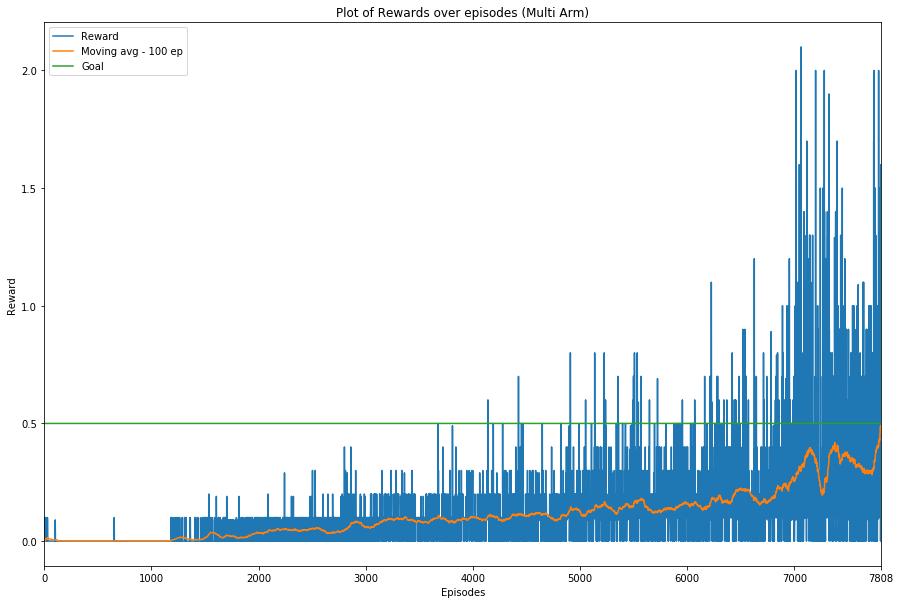

In [16]:
cum_score = []

for i in range(1,min(len(scores), 100)):
    cum_score.append(np.mean(scores[:i]))
    
for i in range(100, len(scores)):
    cum_score.append(np.mean(scores[i-100:i]))
                     
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,10))
plt.plot(scores)
plt.plot(cum_score)
plt.plot(np.linspace(0, len(scores), len(scores)+1), np.ones(len(scores)+1) * 0.5)

plt.xlim(0, len(scores)+1)
x_tick_list = [i*1000 for i in range(len(scores)//1000 +1)]
x_tick_list.append(len(scores))
plt.xticks(x_tick_list)
plt.title('Plot of Rewards over episodes (Multi Arm)')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend(["Reward", "Moving avg - 100 ep", "Goal"])
plt.show()


In [20]:
scores[-100:]

[0.10000000149011612,
 0.20000000298023224,
 0.10000000149011612,
 0.09000000171363354,
 0.5000000074505806,
 0.20000000298023224,
 1.0000000149011612,
 0.0,
 0.10000000149011612,
 0.10000000149011612,
 0.10000000149011612,
 0.0,
 0.20000000298023224,
 0.10000000149011612,
 0.10000000149011612,
 0.0,
 0.5000000074505806,
 0.09000000171363354,
 0.6000000089406967,
 0.6000000089406967,
 0.4000000059604645,
 0.800000011920929,
 0.4000000059604645,
 0.30000000447034836,
 0.30000000447034836,
 0.4000000059604645,
 0.4000000059604645,
 0.10000000149011612,
 0.0,
 0.0,
 0.10000000149011612,
 1.700000025331974,
 0.10000000149011612,
 0.6000000089406967,
 1.0000000149011612,
 2.0000000298023224,
 0.4000000059604645,
 0.7000000104308128,
 0.0,
 0.4000000059604645,
 0.20000000298023224,
 1.5000000223517418,
 0.0,
 0.20000000298023224,
 0.10000000149011612,
 1.5000000223517418,
 0.7000000104308128,
 0.10000000149011612,
 0.6000000089406967,
 0.5000000074505806,
 1.3000000193715096,
 0.0,
 0.300000

In [8]:
agent1 = ActorCriticAgent(state_size, 
                 action_size, 
                 model_class_dict= {"model_class":QSequentialMLPModel, 
                                    'actor_hidden_layers':[256, 256],
                                   'critic_hidden_layers':[512],
                                   'critic_input_layer':0}, 
                    agent_params ={'n_agents':1, 'memory_size':20000, 'min_batch_size':128, 'actor_lr':1e-3, 'critic_lr':1e-4},rnd=seed, index=1)

agent2 = ActorCriticAgent(state_size, 
                 action_size, 
                 model_class_dict= {"model_class":QSequentialMLPModel, 
                                    'actor_hidden_layers':[256, 256],
                                   'critic_hidden_layers':[512],
                                   'critic_input_layer':0}, 
                    agent_params ={'n_agents':1, 'memory_size':20000, 'min_batch_size':128, 'actor_lr':1e-3, 'critic_lr':1e-4},rnd=seed, index=2)
agent1.load()
agent2.load()


env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    action1 = agent1.predict(states[0], False)
    action2 = agent1.predict(states[1], False)
    actions = [action1, action2]                # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)

    dones = env_info.local_done                        # see if episode finished
    print(rewards, dones)
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Score (max over agents):', np.max(scores))

Using: cpu
Using: cpu
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.10000000149011612] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.10000000149011612, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0]

[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.10000000149011612] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.10000000149011612, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 

[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.10000000149011612] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.10000000149011612, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 

[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.10000000149011612] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.10000000149011612, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 0.0] [False, False]
[0.0, 